In [41]:
import pandas as pd
import numpy as np 
import yfinance as yf
import os
import matplotlib.pyplot as plt

In [42]:
covid = {'name': 'covid','year': 2020}
asian_crisis = {'name': 'asian_crisis','year': 1997}
sub_primes = {'name': 'subprimes','year': 2007}
energy_crisis_1 = {'name': 'energy_crisis_1','year': 1973}
energy_crisis_2 = {'name': 'energy_crisis_2','year': 1979}
sme = {'name': 'sme','year': 1992}
two000s_recession = {'name': '2000s_recession','year': 2000}
maya_calendar = {'name': 'maya_calendar', 'year' : 2012}
senari_list = [covid, asian_crisis,sub_primes, energy_crisis_1, energy_crisis_2, sme, two000s_recession, maya_calendar]

In [43]:
market_list = ['DIS', 'GM', 'AAPL', 'PG', 'BTC', "AJINY", "MZDAY", "RNO.PA", "TTM"]

In [44]:
def create_senari(market_list, senari_list, window_dwn = 0, window_up = 2):
    for j in market_list:
        try :
            data = yf.Ticker(j)
            df = data.history(period="max")['Close']
            market = data.info['market']
            for i in senari_list:
                name = i['name']
                if i['year'] in df.index.year:
                    df_i = df['{}'.format(i['year']-windw_dw) : '{}'.format(i['year']+window_up)]
                    os.makedirs(f'YahooF_Datas/{name}', exist_ok=True)
                    df_i.to_csv(f'YahooF_Datas/{name}/{name}_{j}_{market}.csv')
        except :
            print("Something went wrong with :", j)
create_senari(market_list, senari_list)

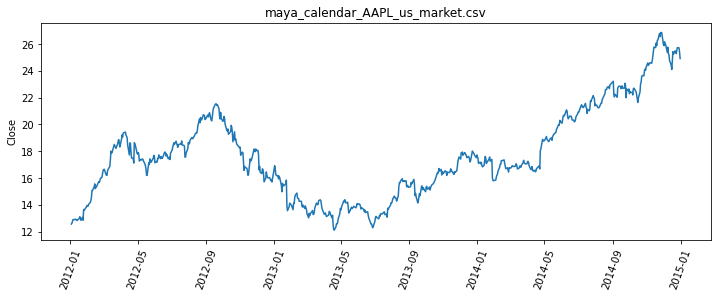

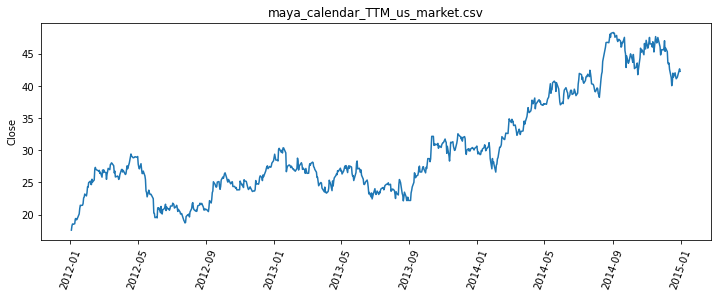

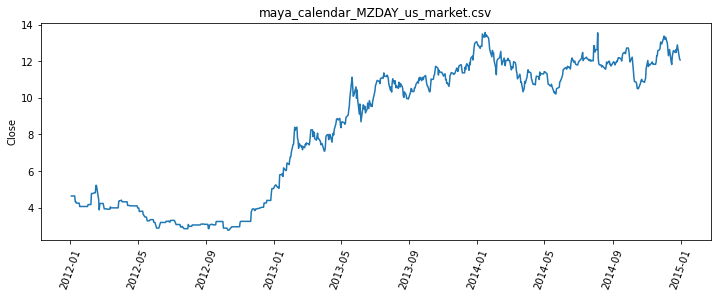

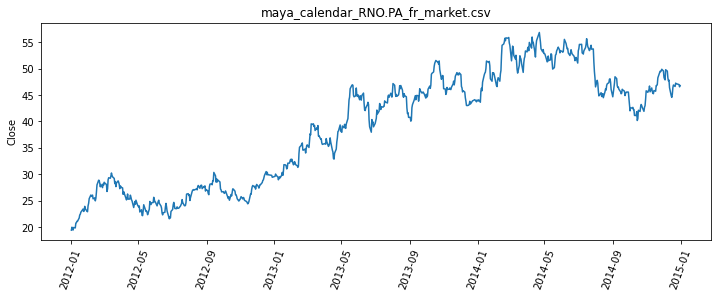

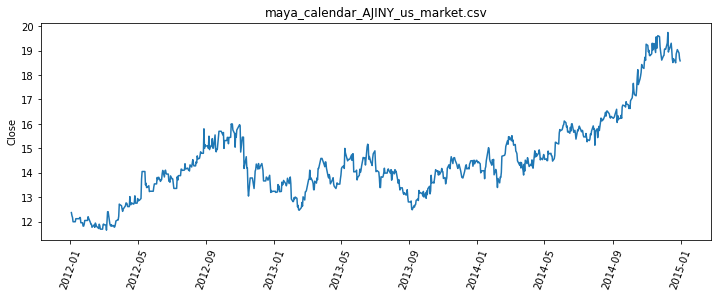

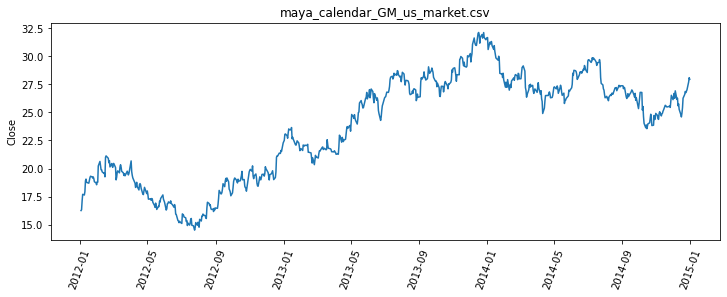

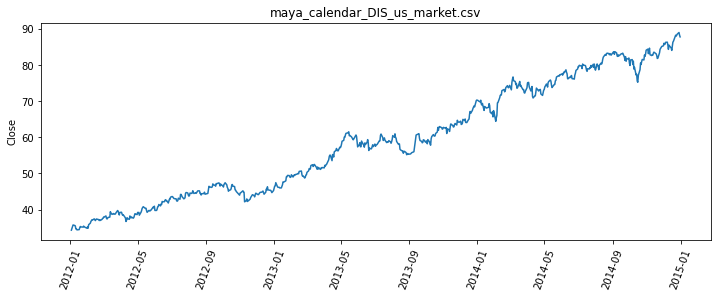

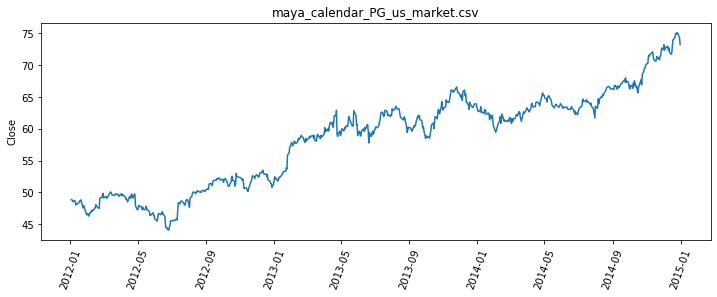

In [45]:
def open_senario(senar_name):
    files = [file for file in os.listdir(f"./YahooF_Datas/{senar_name}")]
    for file in files:
        if ".csv" in file:
            df = pd.read_csv(f"YahooF_Datas/{senar_name}/{file}", index_col =0, parse_dates=True)
            plt.figure(figsize = (12, 4))
            plt.plot(df)
            plt.title(file)
            plt.ylabel('Close')
            plt.xticks(rotation=70)
            plt.show()
open_senario('maya_calendar')